In [61]:
import matplotlib.pyplot as plt
from pickle import dump,load

In [69]:
from LSQClassifier import LSQClassifier
from data_utils import get_train_test

X_train, X_test, y_train, y_test = get_train_test(k=20)

# model = LSQClassifier(solver='lm')
model = LSQClassifier(solver='gauss',solverkwargs={'TOL' : 1e-6,'ITER_MAX' : 600,})
# model = LSQClassifier(solver='sgd',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 600,'batch_size' : 100,'step_size' : 1e-3},verbose=True)

model.fit(X_train,y_train)


In [70]:
from data_utils import accuracy, confusion_matrix

preds = model.predict(X_test)

print(accuracy(preds, y_test))
print(confusion_matrix(preds, y_test))

0.9930651872399445
[[1133.    2.]
 [  13. 1015.]]


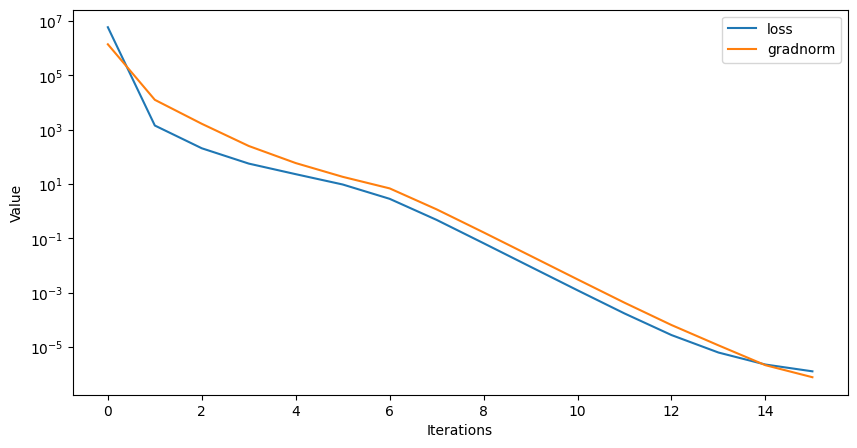

In [71]:
loss = model.report['Loss_vals']
grad = model.report['gradnorm_vals']

plt.figure(figsize=(10,5))
plt.plot(loss,label = 'loss')
plt.plot(grad,label = 'gradnorm')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale('log')
plt.legend()
plt.show()

In [62]:
from data_utils import accuracy, confusion_matrix
lmruns = {}
for k in range(3,20):
    print(f"k = {k}")
    X_train, X_test, y_train, y_test = get_train_test(k=k)
    model = LSQClassifier(solver='lm',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 100,})
    model.fit(X_train,y_train)

    preds = model.predict(X_test)
    acc = accuracy(preds, y_test)
    cm  = confusion_matrix(preds, y_test)
    print(accuracy(preds, y_test))
    print(confusion_matrix(preds, y_test))
    lmruns[k] = {
        'acc': acc,
        'cm': cm,
        'misses': cm[0][1]+cm[1][0],
    }
    # accs[k] = acc
    # cms[k] = cm



k = 3
0.9805825242718447
[[1125.   10.]
 [  32.  996.]]
k = 4
0.9838187702265372
[[1129.    6.]
 [  29.  999.]]
k = 5
0.9852057327785483
[[1128.    7.]
 [  25. 1003.]]
k = 6
0.9865926953305594
[[1130.    5.]
 [  24. 1004.]]
k = 7
0.9912159038372631
[[1131.    4.]
 [  15. 1013.]]
k = 8
0.9893666204345816
[[1132.    3.]
 [  20. 1008.]]
k = 9
0.9889042995839112
[[1131.    4.]
 [  20. 1008.]]
k = 10
0.9902912621359223
[[1132.    3.]
 [  18. 1010.]]
k = 11
0.9893666204345816
[[1131.    4.]
 [  19. 1009.]]
k = 12
0.9889042995839112
[[1131.    4.]
 [  20. 1008.]]
k = 13
0.9893666204345816
[[1131.    4.]
 [  19. 1009.]]
k = 14
0.9902912621359223
[[1132.    3.]
 [  18. 1010.]]
k = 15
0.9902912621359223
[[1130.    5.]
 [  16. 1012.]]
k = 16
0.9893666204345816
[[1129.    6.]
 [  17. 1011.]]
k = 17
0.9930651872399445
[[1132.    3.]
 [  12. 1016.]]
k = 18
0.9944521497919556
[[1133.    2.]
 [  10. 1018.]]
k = 19
0.9944521497919556
[[1133.    2.]
 [  10. 1018.]]


In [63]:
with open('./lmruns.pkl','wb') as file:
    dump(lmruns,file)
# with open('./runs.pkl','rb') as file:
#     lmruns = load(file)

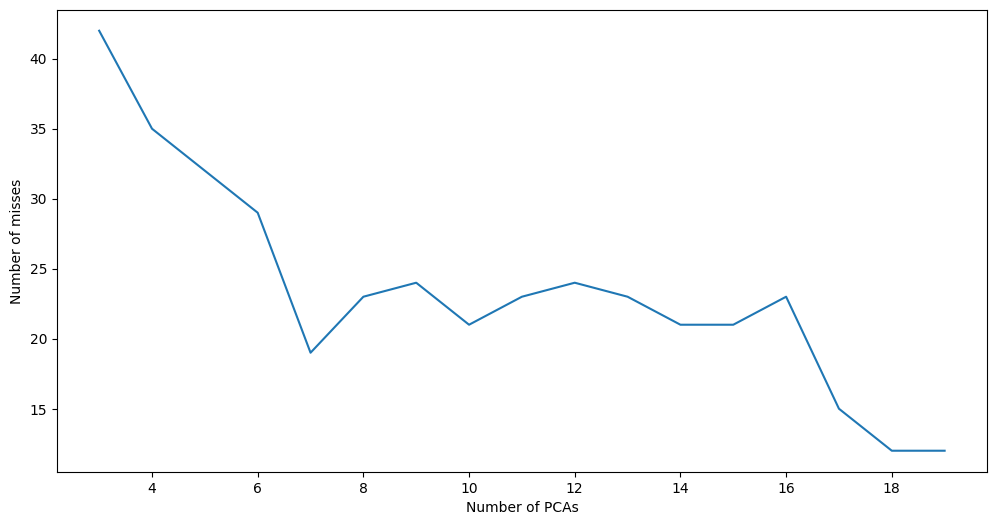

In [65]:
fig = plt.figure(figsize=(12,6))
x = []
y = []
for k,v in lmruns.items():
    x.append(k)
    y.append(v['misses'])
plt.plot(x,y)
plt.xlabel('Number of PCAs')
plt.ylabel('Number of misses')
plt.show()

In [15]:
from LSQClassifier import LSQClassifier
from data_utils import get_train_test
import numpy as np

X_train, X_test, y_train, y_test = get_train_test(k=20)
# X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
def constant_step_size(iter,size=5e-2):
    return size # Fixed step size

def inverse_scaling(iter, eta0=5e-2, gamma=0.001):
    return eta0 / (1 + gamma * iter)

def exponential_decay(iter, eta0=5e-2, lam=0.05):
    return eta0 * np.exp(-lam * iter)

def step_decay(iter, eta0=5e-2, drop=0.5, epochs_drop=25):
    return eta0 * (drop ** (iter // epochs_drop))

model = LSQClassifier(solver='sgd',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 100,'batch_size' : 256,'step_size' : step_decay},lam=0.1,verbose=True)

model.fit(X_train,y_train)


from data_utils import accuracy, confusion_matrix

preds = model.predict(X_test)



print(accuracy(preds, y_test))
print(confusion_matrix(preds, y_test))


SGD, iter #0: loss = 5.7266e+01, gradnorm = 1.6758e+02
SGD, iter #1: loss = 4.0607e+01, gradnorm = 4.4622e+01
SGD, iter #2: loss = 3.6463e+01, gradnorm = 2.8650e+01
SGD, iter #3: loss = 3.3151e+01, gradnorm = 1.8567e+01
SGD, iter #4: loss = 3.1547e+01, gradnorm = 1.3314e+01
SGD, iter #5: loss = 2.9556e+01, gradnorm = 9.3957e+00
SGD, iter #6: loss = 2.9241e+01, gradnorm = 7.4013e+00
SGD, iter #7: loss = 2.8508e+01, gradnorm = 5.7338e+00
SGD, iter #8: loss = 2.8239e+01, gradnorm = 5.2072e+00
SGD, iter #9: loss = 2.8020e+01, gradnorm = 4.1251e+00
SGD, iter #10: loss = 2.7961e+01, gradnorm = 3.8687e+00
SGD, iter #11: loss = 2.7904e+01, gradnorm = 3.6501e+00
SGD, iter #12: loss = 2.7741e+01, gradnorm = 3.4411e+00
SGD, iter #13: loss = 2.7578e+01, gradnorm = 3.1336e+00
SGD, iter #14: loss = 2.7541e+01, gradnorm = 3.0105e+00
SGD, iter #15: loss = 2.7268e+01, gradnorm = 2.9021e+00
SGD, iter #16: loss = 2.7193e+01, gradnorm = 2.5513e+00
SGD, iter #17: loss = 2.7147e+01, gradnorm = 2.5611e+00
SG

In [21]:
runs = {}
for batch_size in [1,32,256,512,1024]:
    for lam in [0.1,0.5,0.9]:
        for step_fun in [constant_step_size,inverse_scaling,exponential_decay,step_decay]:
            run_name = f'batch_size: {batch_size}, lam: {lam}, step_strategy: {step_fun.__name__}'
            print('starting run: ',run_name)
            model = LSQClassifier(solver='sgd',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 100,'batch_size' : 256,'step_size' : step_decay},lam=0.1,verbose=False)
            model.fit(X_train,y_train)
            preds = model.predict(X_test)
            acc = accuracy(preds, y_test)
            loss = model.report['Loss_vals']
            grad = model.report['gradnorm_vals']
            runs[run_name] = {'acc' : acc,'loss' : loss,'grad' : grad}
            print('finished run: ',run_name)
            print('acc: ',acc)
            # print('loss: ',loss)
            # print('grad: ',grad)

starting run:  batch_size: 1, lam: 0.1, step_strategy: constant_step_size


finished run:  batch_size: 1, lam: 0.1, step_strategy: constant_step_size
acc:  0.9852057327785483
starting run:  batch_size: 1, lam: 0.1, step_strategy: inverse_scaling
finished run:  batch_size: 1, lam: 0.1, step_strategy: inverse_scaling
acc:  0.9856680536292187
starting run:  batch_size: 1, lam: 0.1, step_strategy: exponential_decay
finished run:  batch_size: 1, lam: 0.1, step_strategy: exponential_decay
acc:  0.9852057327785483
starting run:  batch_size: 1, lam: 0.1, step_strategy: step_decay
finished run:  batch_size: 1, lam: 0.1, step_strategy: step_decay
acc:  0.9833564493758669
starting run:  batch_size: 1, lam: 0.5, step_strategy: constant_step_size
finished run:  batch_size: 1, lam: 0.5, step_strategy: constant_step_size
acc:  0.984743411927878
starting run:  batch_size: 1, lam: 0.5, step_strategy: inverse_scaling
finished run:  batch_size: 1, lam: 0.5, step_strategy: inverse_scaling
acc:  0.9833564493758669
starting run:  batch_size: 1, lam: 0.5, step_strategy: exponential_

In [27]:
from pickle import dump,load

# with open('./runs.pkl','wb') as file:
#     dump(runs,file)
with open('./runs.pkl','rb') as file:
    runs = load(file)

In [38]:
accs = [runs[key]['acc'] for key in runs.keys()]
print(max(accs),list(runs.keys())[accs.index(max(accs))])
print(min(accs),list(runs.keys())[accs.index(min(accs))])


0.9879796578825705 batch_size: 1, lam: 0.9, step_strategy: inverse_scaling
0.9819694868238558 batch_size: 512, lam: 0.9, step_strategy: inverse_scaling


In [44]:
accs = []
for key in runs.keys():
    if 'batch_size: 1,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('batch_size: 1,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'batch_size: 32,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('batch_size: 32,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'batch_size: 256,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('batch_size: 256,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'batch_size: 512,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('batch_size: 512,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'batch_size: 1024,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('batch_size: 1024,')
print(np.mean(accs))
print(np.std(accs))

batch_size: 1,
0.9848975188781015
0.001403981134095283
batch_size: 32,
0.9844351980274312
0.001213439339499443
batch_size: 256,
0.9851672060409925
0.001327356540064106
batch_size: 512,
0.9849360456156574
0.00140556606156223
batch_size: 1024,
0.9853213129912158
0.0015463578548612664


In [45]:
accs = []
for key in runs.keys():
    if 'lam: 0.1,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('lam: 0.1,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'lam: 0.5,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('lam: 0.5,')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'lam: 0.9,' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('lam: 0.9,')
print(np.mean(accs))
print(np.std(accs))

lam: 0.1,
0.9849052242256127
0.0013658040912364626
lam: 0.5,
0.9846509477577439
0.0011659288222763292
lam: 0.9,
0.9852981969486825
0.001605525229235811


In [46]:
accs = []
for key in runs.keys():
    if 'step_strategy: constant_step_size' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('step_strategy: constant_step_size')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'step_strategy: inverse_scaling' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('step_strategy: inverse_scaling')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'step_strategy: exponential_decay' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('step_strategy: exponential_decay')
print(np.mean(accs))
print(np.std(accs))

accs = []
for key in runs.keys():
    if 'step_strategy: step_decay' in key:
        # print(key)
        # print(runs[key]['acc'])
        accs.append(runs[key]['acc'])
print('step_strategy: step_decay')
print(np.mean(accs))
print(np.std(accs))

step_strategy: constant_step_size
0.9846509477577441
0.0011349639475741683
step_strategy: inverse_scaling
0.9845893049776543
0.0015533491346406611
step_strategy: exponential_decay
0.9848050547079673
0.00101101676479314
step_strategy: step_decay
0.9857605177993527
0.001549062336030702


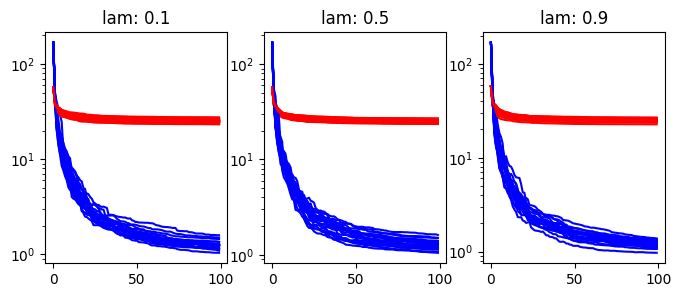

In [58]:
fig, ax = plt.subplots(1,3,figsize=(8,3))

ax[0].set_title('lam: 0.1')
for key in runs.keys():
    if 'lam: 0.1,' in key:
        ax[0].set_yscale('log')
        ax[0].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[0].plot(runs[key]['loss'],label = key,color = 'red')

ax[1].set_title('lam: 0.5')
for key in runs.keys():
    if 'lam: 0.5,' in key:
        ax[1].set_yscale('log')
        ax[1].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[1].plot(runs[key]['loss'],label = key,color = 'red')

ax[2].set_title('lam: 0.9')
for key in runs.keys():
    if 'lam: 0.9' in key:
        ax[2].set_yscale('log')
        ax[2].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[2].plot(runs[key]['loss'],label = key,color = 'red')

# ax[3].set_title('step_decay')
# for key in runs.keys():
#     if 'step_strategy: step_decay' in key:
#         ax[3].set_yscale('log')
#         ax[3].plot(runs[key]['grad'],label = key,color = 'blue')
#         ax[3].plot(runs[key]['loss'],label = key,color = 'red')

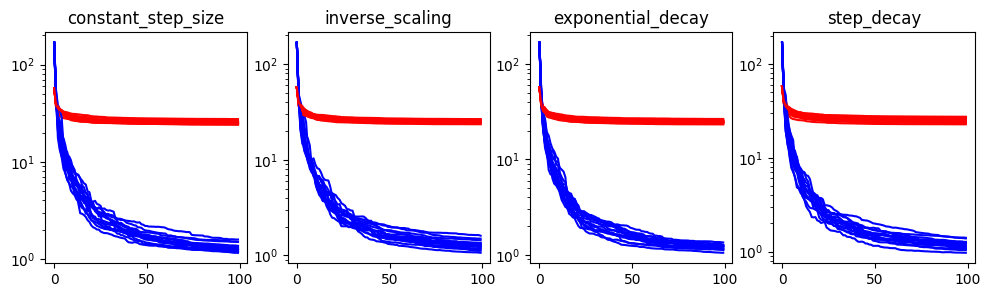

In [59]:
fig, ax = plt.subplots(1,4,figsize=(12,3))

ax[0].set_title('constant_step_size')
for key in runs.keys():
    if 'step_strategy: constant_step_size' in key:
        ax[0].set_yscale('log')
        ax[0].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[0].plot(runs[key]['loss'],label = key,color = 'red')

ax[1].set_title('inverse_scaling')
for key in runs.keys():
    if 'step_strategy: inverse_scaling' in key:
        ax[1].set_yscale('log')
        ax[1].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[1].plot(runs[key]['loss'],label = key,color = 'red')

ax[2].set_title('exponential_decay')
for key in runs.keys():
    if 'step_strategy: exponential_decay' in key:
        ax[2].set_yscale('log')
        ax[2].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[2].plot(runs[key]['loss'],label = key,color = 'red')

ax[3].set_title('step_decay')
for key in runs.keys():
    if 'step_strategy: step_decay' in key:
        ax[3].set_yscale('log')
        ax[3].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[3].plot(runs[key]['loss'],label = key,color = 'red')

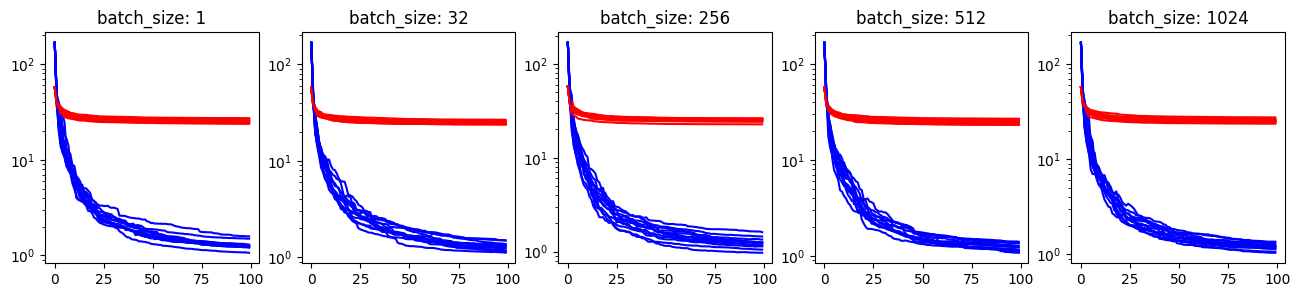

In [60]:
fig, ax = plt.subplots(1,5,figsize=(16,3))

ax[0].set_title('batch_size: 1')
for key in runs.keys():
    if 'batch_size: 1,' in key:
        ax[0].set_yscale('log')
        ax[0].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[0].plot(runs[key]['loss'],label = key,color = 'red')

ax[1].set_title('batch_size: 32')
for key in runs.keys():
    if 'batch_size: 32,' in key:
        ax[1].set_yscale('log')
        ax[1].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[1].plot(runs[key]['loss'],label = key,color = 'red')

ax[2].set_title('batch_size: 256')
for key in runs.keys():
    if 'batch_size: 256,' in key:
        ax[2].set_yscale('log')
        ax[2].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[2].plot(runs[key]['loss'],label = key,color = 'red')

ax[3].set_title('batch_size: 512')
for key in runs.keys():
    if 'batch_size: 512,' in key:
        ax[3].set_yscale('log')
        ax[3].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[3].plot(runs[key]['loss'],label = key,color = 'red')

ax[4].set_title('batch_size: 1024')
for key in runs.keys():
    if 'batch_size: 1024,' in key:
        ax[4].set_yscale('log')
        ax[4].plot(runs[key]['grad'],label = key,color = 'blue')
        ax[4].plot(runs[key]['loss'],label = key,color = 'red')